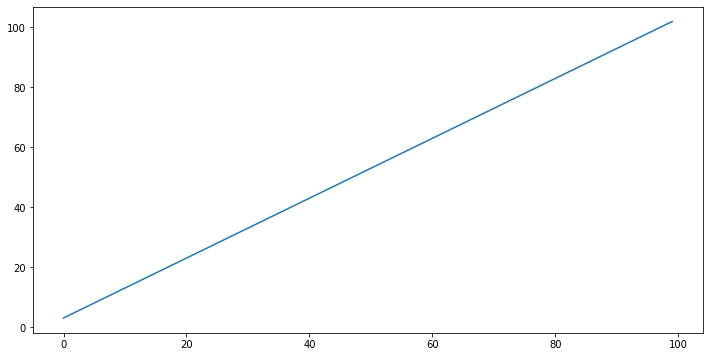

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102])

In [1]:
##lineAndRandomPoints
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.show()
line

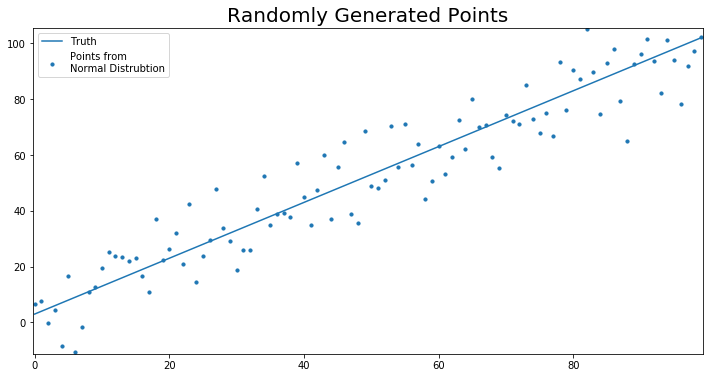

In [2]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, 10))

figure = plt.figure(figsize = (12, 6))
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.plot(line, label ="Truth")
plt.scatter(np.arange(len(points)), points, s = 10,
           label = "Points from\nNormal Distrubtion")
plt.title("Randomly Generated Points", fontsize = 20)
plt.legend(loc = "best")
plt.show()

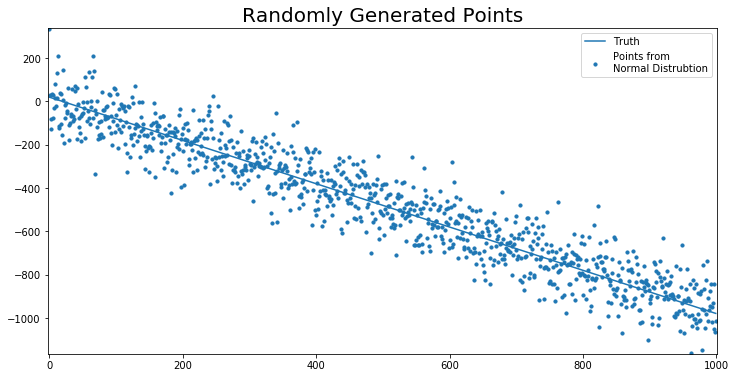

In [3]:
import random

def build_random_data_with_line(y_int, slope, SD = 1, line_length = 100):
    line = np.array([slope * i + y_int for i in range(line_length)])    
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
        
    return line, points

def plot_line(line, points, line_name = "Truth",
              title = "Randomly Generated Points"):

    figure = plt.figure(figsize = (12, 6))
    plt.rcParams["axes.xmargin"] = 0
    plt.rcParams["axes.ymargin"] = 0
    plt.plot(line, label =line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
               label = "Points from\nNormal Distrubtion")
    plt.title("Randomly Generated Points", fontsize = 20)
    plt.legend(loc = "best")
    plt.show()
    
line, points = build_random_data_with_line(y_int = 20, slope = -1, SD = 100, line_length = 1000)
plot_line(line, points)

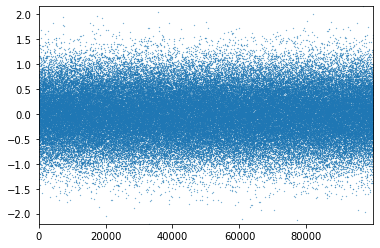

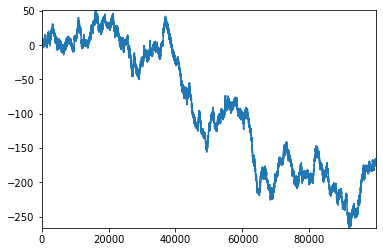

In [4]:
#montecarloSimulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


mu = 0
#SD is sigma, variance is sigma**2
sigma = .5
random_list = []
observations = 100000
for i in range(100000):
    random_list.append(random.normalvariate(mu, sigma))

plt.plot(random_list, ls = "",linewidth = 1, marker =".", markersize = .5)
plt.show()
plt.close()

simulation = [] 

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i-1] + val)
        
plt.plot(simulation)
plt.show()
plt.close()



In [5]:
def run_monte_carlo(mean, sigma, num_sims, sim_dict, index):
    
    for i in range(num_sims):
        sim_dict[i] = {}
        for ix in index:
            sim_dict[i][ix] = random.normalvariate(mean, sigma)


In [6]:
mean = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
index = np.arange(2000)
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, index)
        
monte_carlo_sim_df = (pd.DataFrame(monte_carlo_sim_dict))
        
monte_carlo_sim_df

0         1         2         3         4         5         6     \
0     1.319698  0.705080 -0.449172 -0.954397  2.165242  0.410299 -2.667872   
1    -0.094153 -0.841912 -0.036650  1.810450 -0.901272  0.189658  0.862761   
2     1.001903 -0.712670  1.159362 -0.781050 -0.838335 -1.663900  0.623486   
3    -0.012504  0.835284 -0.934162  1.136621 -0.419083 -1.391916 -0.855570   
4    -1.671175 -0.854889  0.855279  2.964319 -0.833270 -0.025418 -0.683745   
5    -0.938790  0.313637 -0.954032 -0.469240 -0.725314 -2.257243 -0.105771   
6     0.244585  0.855108  1.339141 -0.242514  0.253110 -0.471180  0.768404   
7     0.356950  1.101681 -0.315308 -0.708706  2.393720 -0.431609  0.595575   
8    -2.862533 -0.449574 -1.766743  1.439447 -0.621478  0.818564 -2.108799   
9     0.830255 -0.682370 -1.340525 -0.083812 -0.390143  0.011835 -0.782929   
10   -0.362552  1.984865 -0.405756  1.975120 -1.284333  1.505774 -0.380103   
11   -0.397677 -0.041763  1.190580  0.203693 -0.917171 -0.190349  0.406892   
12   -0.021382  0.942882  0.584406 -1.109769  0.218536  0.632702  0.402400   
13    1.365476  0.040688 -0.068379 -0.559133 -0.731936 -0.565384  0.467759   
14   -0.954852 -1.663792  2.092527  1.284352  1.295452 -0.749485 -2.014064   
15    0.016269 -0.091581  0.698595  1.103831 -0.470050 -0.986680  0.981383   
16   -0.746924  1.300706  0.923159 -0.777257 -1.682259  1.080474  0.322409   
17   -0.746684  0.185182  0.040020 -0.161341 -0.102270  0.604687 -0.110160   
18    0.402645  0.523153 -0.561713 -0.137341 -2.556195 -0.580327  0.798789   
19    1.578858  0.891505  1.541820 -0.990378 -0.500771  0.289418 -0.435826   
20   -1.968942  0.313606  0.816916  1.473489  0.395013 -1.225765  1.133173   
21    0.177448 -1.015337 -0.839688  1.935020 -0.262749  0.545982 -0.068148   
22    2.262282  0.185598  0.690420 -0.649045  1.611106 -0.878039  1.647424   
23   -0.807613  0.300811 -0.027310  2.676811 -0.602434  0.813746  0.064073   
24    0.768129  1.326220 -0.254414 -0.490855 -1.700129  0.351976  1.080602   
25   -1.187274  0.663961  0.130123 -1.648894  0.703564 -0.820470 -0.015744   
26    0.581641  0.595346 -1.560114  0.953450  1.648153  0.317204  0.441285   
27   -2.291261  0.911335 -0.487150 -1.490353 -0.393231 -1.200146 -0.319599   
28    0.658964 -1.479391  0.287198 -1.858865 -1.243772 -0.019812 -0.141054   
29    0.042814 -0.972852  0.109017 -1.191620  0.446359 -1.576329  1.080246   
...        ...       ...       ...       ...       ...       ...       ...   
1970  1.867677  0.363052  0.269342  1.240322 -0.474434  0.351729  1.109284   
1971  0.237078  0.440394  1.519082 -2.125976  1.336463  0.531843 -1.023881   
1972 -0.848680  0.206086 -0.055524 -0.676317 -0.092599  0.534057 -1.309462   
1973  0.145641 -1.206501  1.729046  0.045549  0.374279 -2.340235 -2.415493   
1974  0.101744 -1.699714  1.263199 -0.915920 -0.635291  1.133894 -1.053590   
1975 -0.444227  0.061268 -0.705321  1.475923  1.127176  1.628568 -1.162736   
1976  1.708486 -1.207983  0.086169 -0.750543  1.336603 -0.428469  0.442028   
1977 -1.068878 -0.292385  1.899450 -1.194070 -1.167386 -0.513850 -0.541047   
1978  0.028536  0.448453  0.682713  0.772183 -0.242950 -2.372801 -0.114723   
1979 -1.324369 -0.614329 -0.979176 -0.233968 -0.800541  0.193073 -0.698683   
1980  0.656563  0.978732  0.239051 -1.413298 -0.699929 -1.356040  1.108230   
1981  1.435123 -2.440575  0.628638 -0.922995 -0.749921 -0.510600 -1.982289   
1982 -1.532406 -0.705670 -1.004964  0.562420  1.539855  1.161828  0.840366   
1983 -0.206566  0.562096  1.937328  0.911762 -0.927432 -0.249108  0.104400   
1984  0.194024 -0.772200  0.670963 -1.035647  0.803813 -0.724368  0.542909   
1985 -0.408907  1.301413 -0.806784 -0.155443 -0.992995 -0.783632 -1.493387   
1986 -0.668136 -0.575015  0.292538 -1.843777  1.093776  0.811395 -0.015341   
1987 -3.492931 -0.701274  1.021258 -0.536510  0.072543 -1.815214 -0.815052   
1988 -0.534422  0.267320 -0.346888 -0.057739  0.583750 -0.769048 -2.070525   
1989  0.220463  1.820971 -0.6121

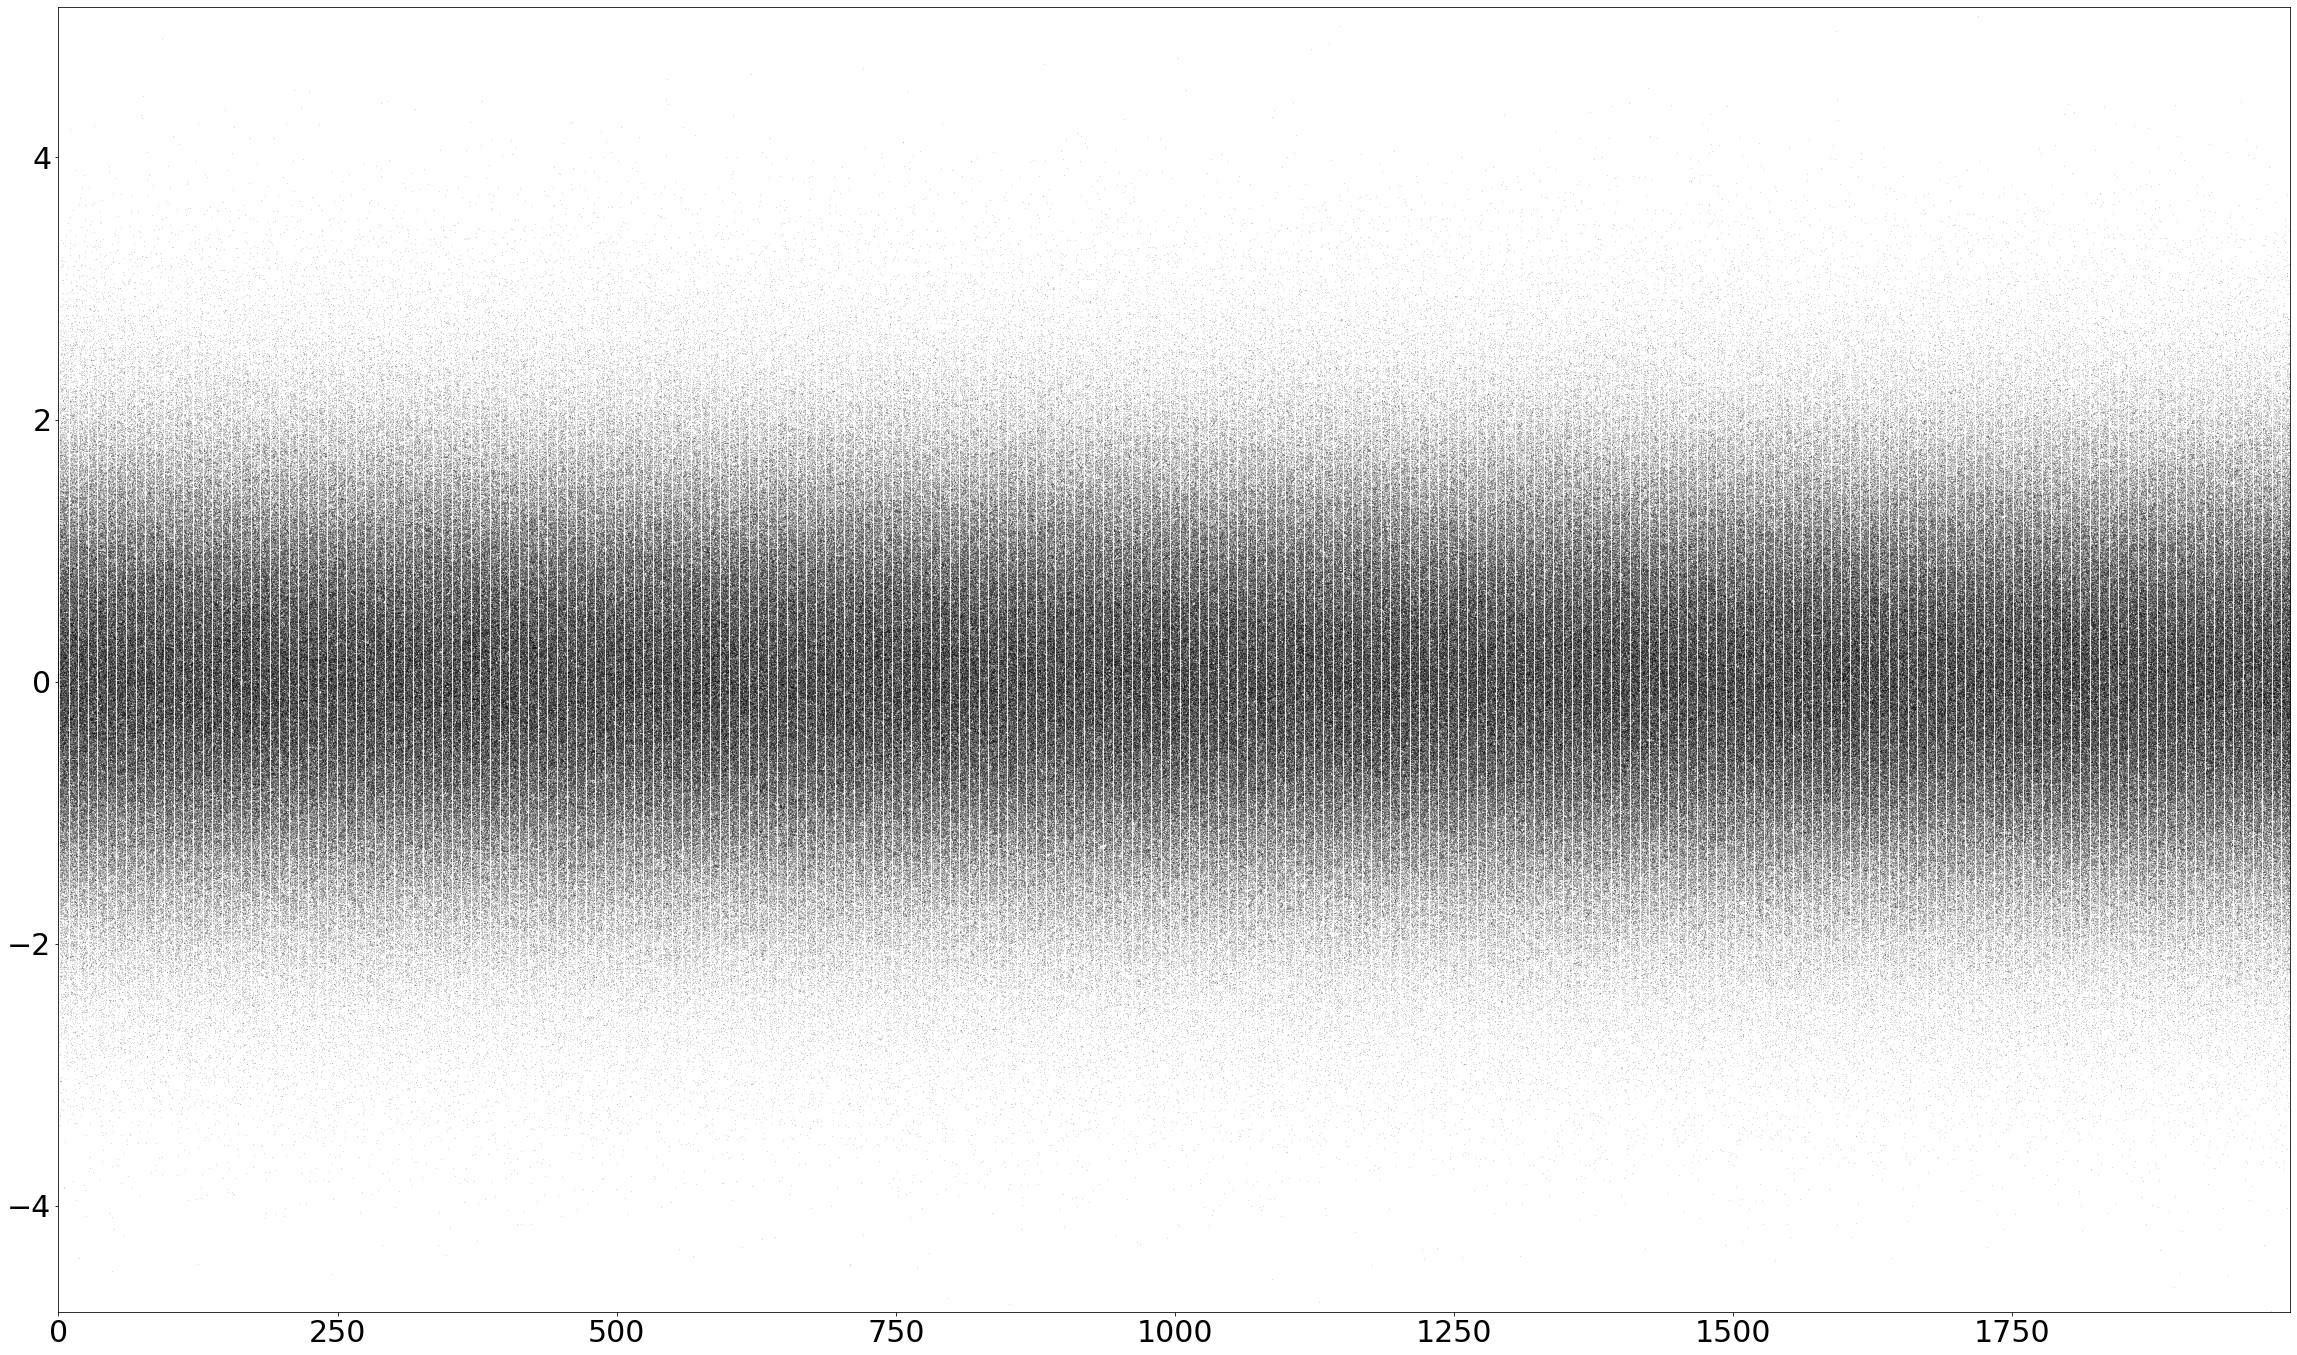

In [7]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["font.size"] = 30

fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.plot.line(legend = False, ls = " ", marker=".", markersize = .2, 
                            color ="k", alpha = .5, ax = ax)

plt.show()

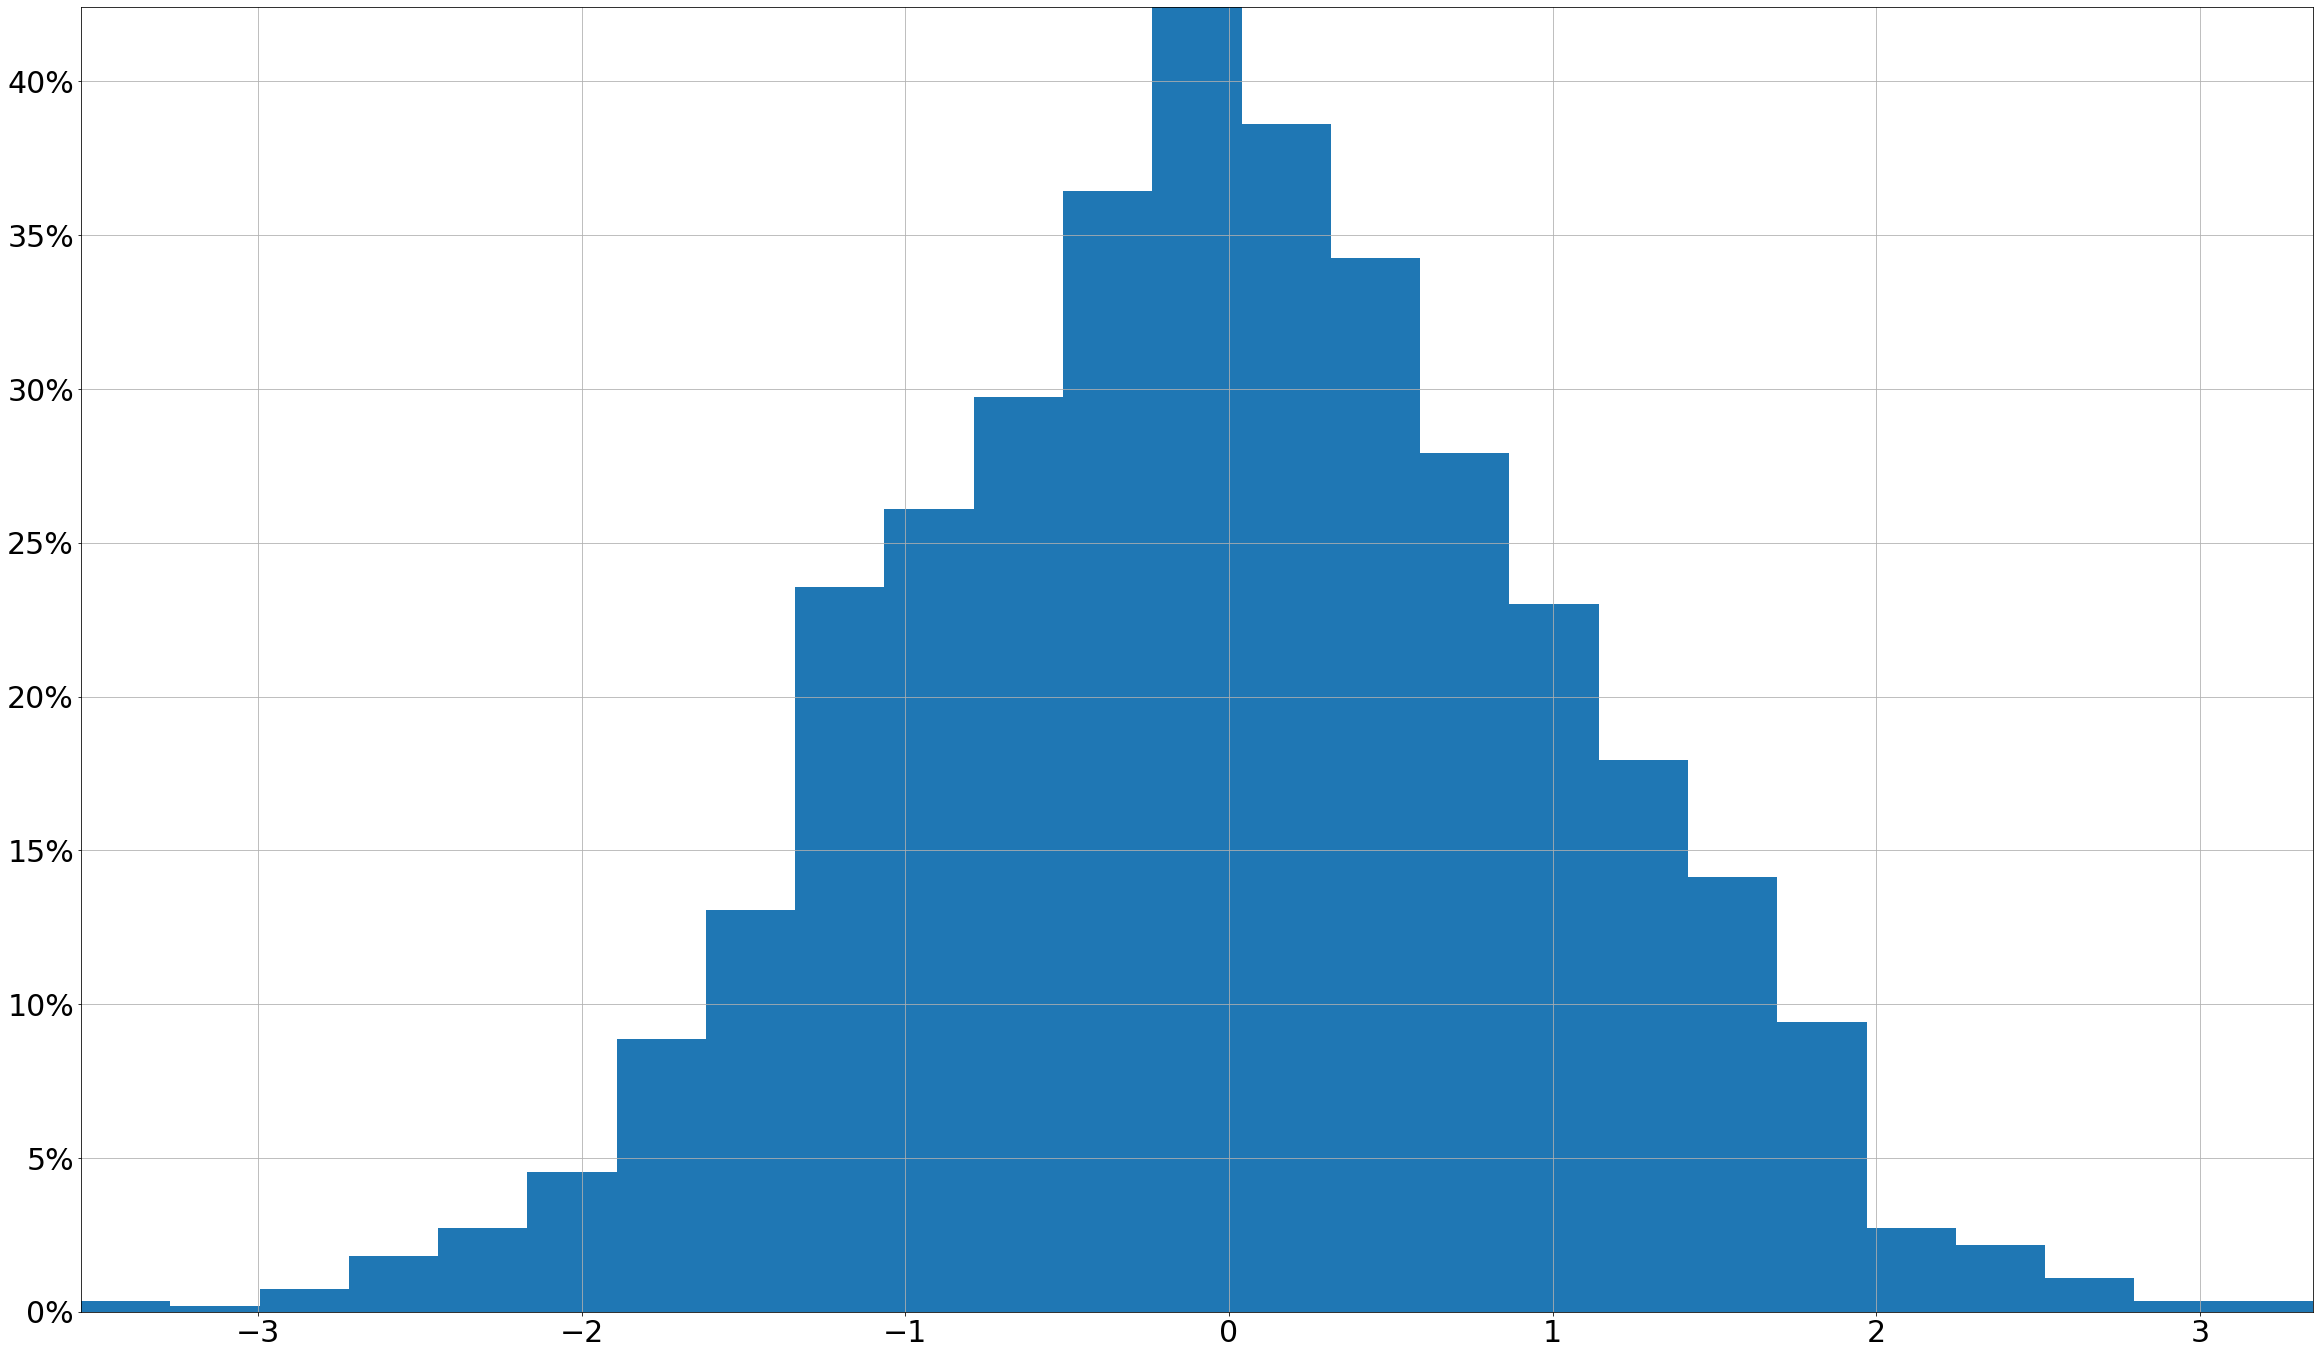

In [8]:
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.iloc[-1].hist(bins = 25, density = True,
                                ax = ax)

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
plt.show()
plt.close()

## Monte Carlo with a Positive Trend

In [9]:
mean = .05
sigma = .5
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 2000
index = np.arange(periods)
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, index)

monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).cumsum()
monte_carlo_sim_df

0           1           2          3          4          5     \
0       0.518099    0.523339    0.500197  -0.232352  -0.383501   0.065211   
1       0.983547    0.453510    0.140653  -0.899554   0.184192   0.418139   
2       1.787839    1.012480    0.254948  -0.747050  -0.403748   0.594121   
3       1.558436    2.004242   -1.220326  -0.132287  -1.408921   0.711561   
4       1.909035    2.733114   -1.458477   0.497170  -2.010711   0.704949   
5       1.958310    2.766404   -2.023420  -0.110317  -1.958104   1.147601   
6       1.799669    3.222385   -1.986729  -1.091433  -1.988309   1.051742   
7       1.243589    3.919454   -1.729389  -0.979769  -2.623724   0.807651   
8       0.446802    3.650671   -1.581696  -0.189728  -2.096094   0.476869   
9       1.246331    4.630314   -1.719828  -0.152191  -1.793026   0.569376   
10      1.051876    4.466418   -1.089889  -0.378524  -1.710482   1.392198   
11      1.048273    4.515522   -1.298995   0.270387  -0.724549   1.562217   
12      1.842807    4.571137   -0.397715  -0.457172  -1.284903   1.801177   
13      1.580127    4.317915   -0.167577  -0.713923  -1.037036   2.600474   
14      1.585038    4.106193   -0.515055  -0.027645  -1.033181   2.492661   
15      1.470662    4.437776   -0.575848   0.166190  -1.111478   3.418663   
16      0.900486    5.252923   -0.737591   0.303775  -1.616719   3.854846   
17      1.603343    5.111417   -1.319741   0.004202  -0.618218   3.946970   
18      2.306737    5.367640   -1.157548   0.165414   0.114017   3.643186   
19      2.817714    5.329722   -1.333375   1.080426  -0.472925   4.557530   
20      2.604720    5.586622   -1.654135   1.586595  -0.710960   4.828388   
21      2.743724    5.408781   -0.868769   1.386276  -0.734111   5.845795   
22      2.879979    5.340854   -0.250958   2.218507   0.133234   6.211200   
23      2.682020    5.790718   -0.202390   1.946014   0.049345   6.280862   
24      2.356314    6.959296   -1.075126   1.915874   0.209329   6.358026   
25      2.653741    6.827241   -1.163178   2.084634   0.245001   5.867216   
26      2.977961    7.414427   -1.005887   1.421534   0.250513   5.470677   
27      2.748303    6.675269   -1.839146   1.055244   0.318311   5.466764   
28      2.036678    7.246509   -1.335645   1.696917   1.058345   5.585386   
29      2.195267    7.825945   -1.344276   2.406754   0.739201   4.942522   
...          ...         ...         ...        ...        ...        ...   
1970  124.388954  114.607730  123.322844  84.902556  76.433197  90.247678   
1971  124.875591  115.157575  123.066485  85.018469  76.476468  89.819617   
1972  125.031822  115.558845  122.408546  86.158772  76.949409  89.909649   
1973  124.508624  115.719509  122.974573  85.559528  77.353992  89.640415   
1974  124.745799  116.001177  123.076852  85.972930  76.978256  89.770443   
1975  125.118336  116.707769  123.493036  85.779064  76.740143  90.428299   
1976  125.622599  116.798787  123.495524  86.147153  75.892790  90.392942   
1977  126.216710  117.155669  123.880189  86.418934  76.443959  89.990207   
1978  126.029358  118.034986  123.708342  86.111133  76.478003  89.451388   
1979  126.803138  117.668981  123.973977  85.508146  76.998224  89.376642   
1980  126.566805  116.704862  124.146745  85.733870  76.701020  89.523149   
1981  127.318286  117.154754  125.232699  84.619302  77.560753  89.077096   
1982  126.967475  117.760788  126.076504  84.692763  77.285098  88.501825   
1983  127.654440  117.404986  125.845769  84.022503  77.059888  88.748274   
1984  127.948236  116.871091  126.090078  83.287544  77.228012  88.149311   
1985  128.197429  116.844198  125.759824  82.886500  77.598407  87.759784   
1986  128.514981  117.348657  125.175985  83.248561  77.197077  88.821321   
1987  129.188769  117.907540  125.421131  83.046379  78.134991  88.918600   
1988  128.817106  117.524300  125.379928  82.448552  78.252506  87.980279   
1989  128.047352  116.863976  125.265643  82.887264  78.808475  89.438152   
1990  12

In [10]:
def plot_monte_carlo_sim(sim_data,  title = None, logy = True):
    sim_data["mean"] = sim_data.mean(axis=1)
    fig, ax = plt.subplots(figsize = (40, 24))
    sim_data.drop("mean", inplace = False, axis = 1).plot.line(
            legend=False, marker =".", markersize = .1, color = "k", alpha = .05, logy = logy, ax = ax)
    sim_data["mean"].plot.line(legend = False, color = "C3", linewidth = 5, logy = logy, ax = ax)
    index = list(sim_data.index) 
    
    
    plt.title(title, fontsize = 50)
    plt.show()
    plt.close()

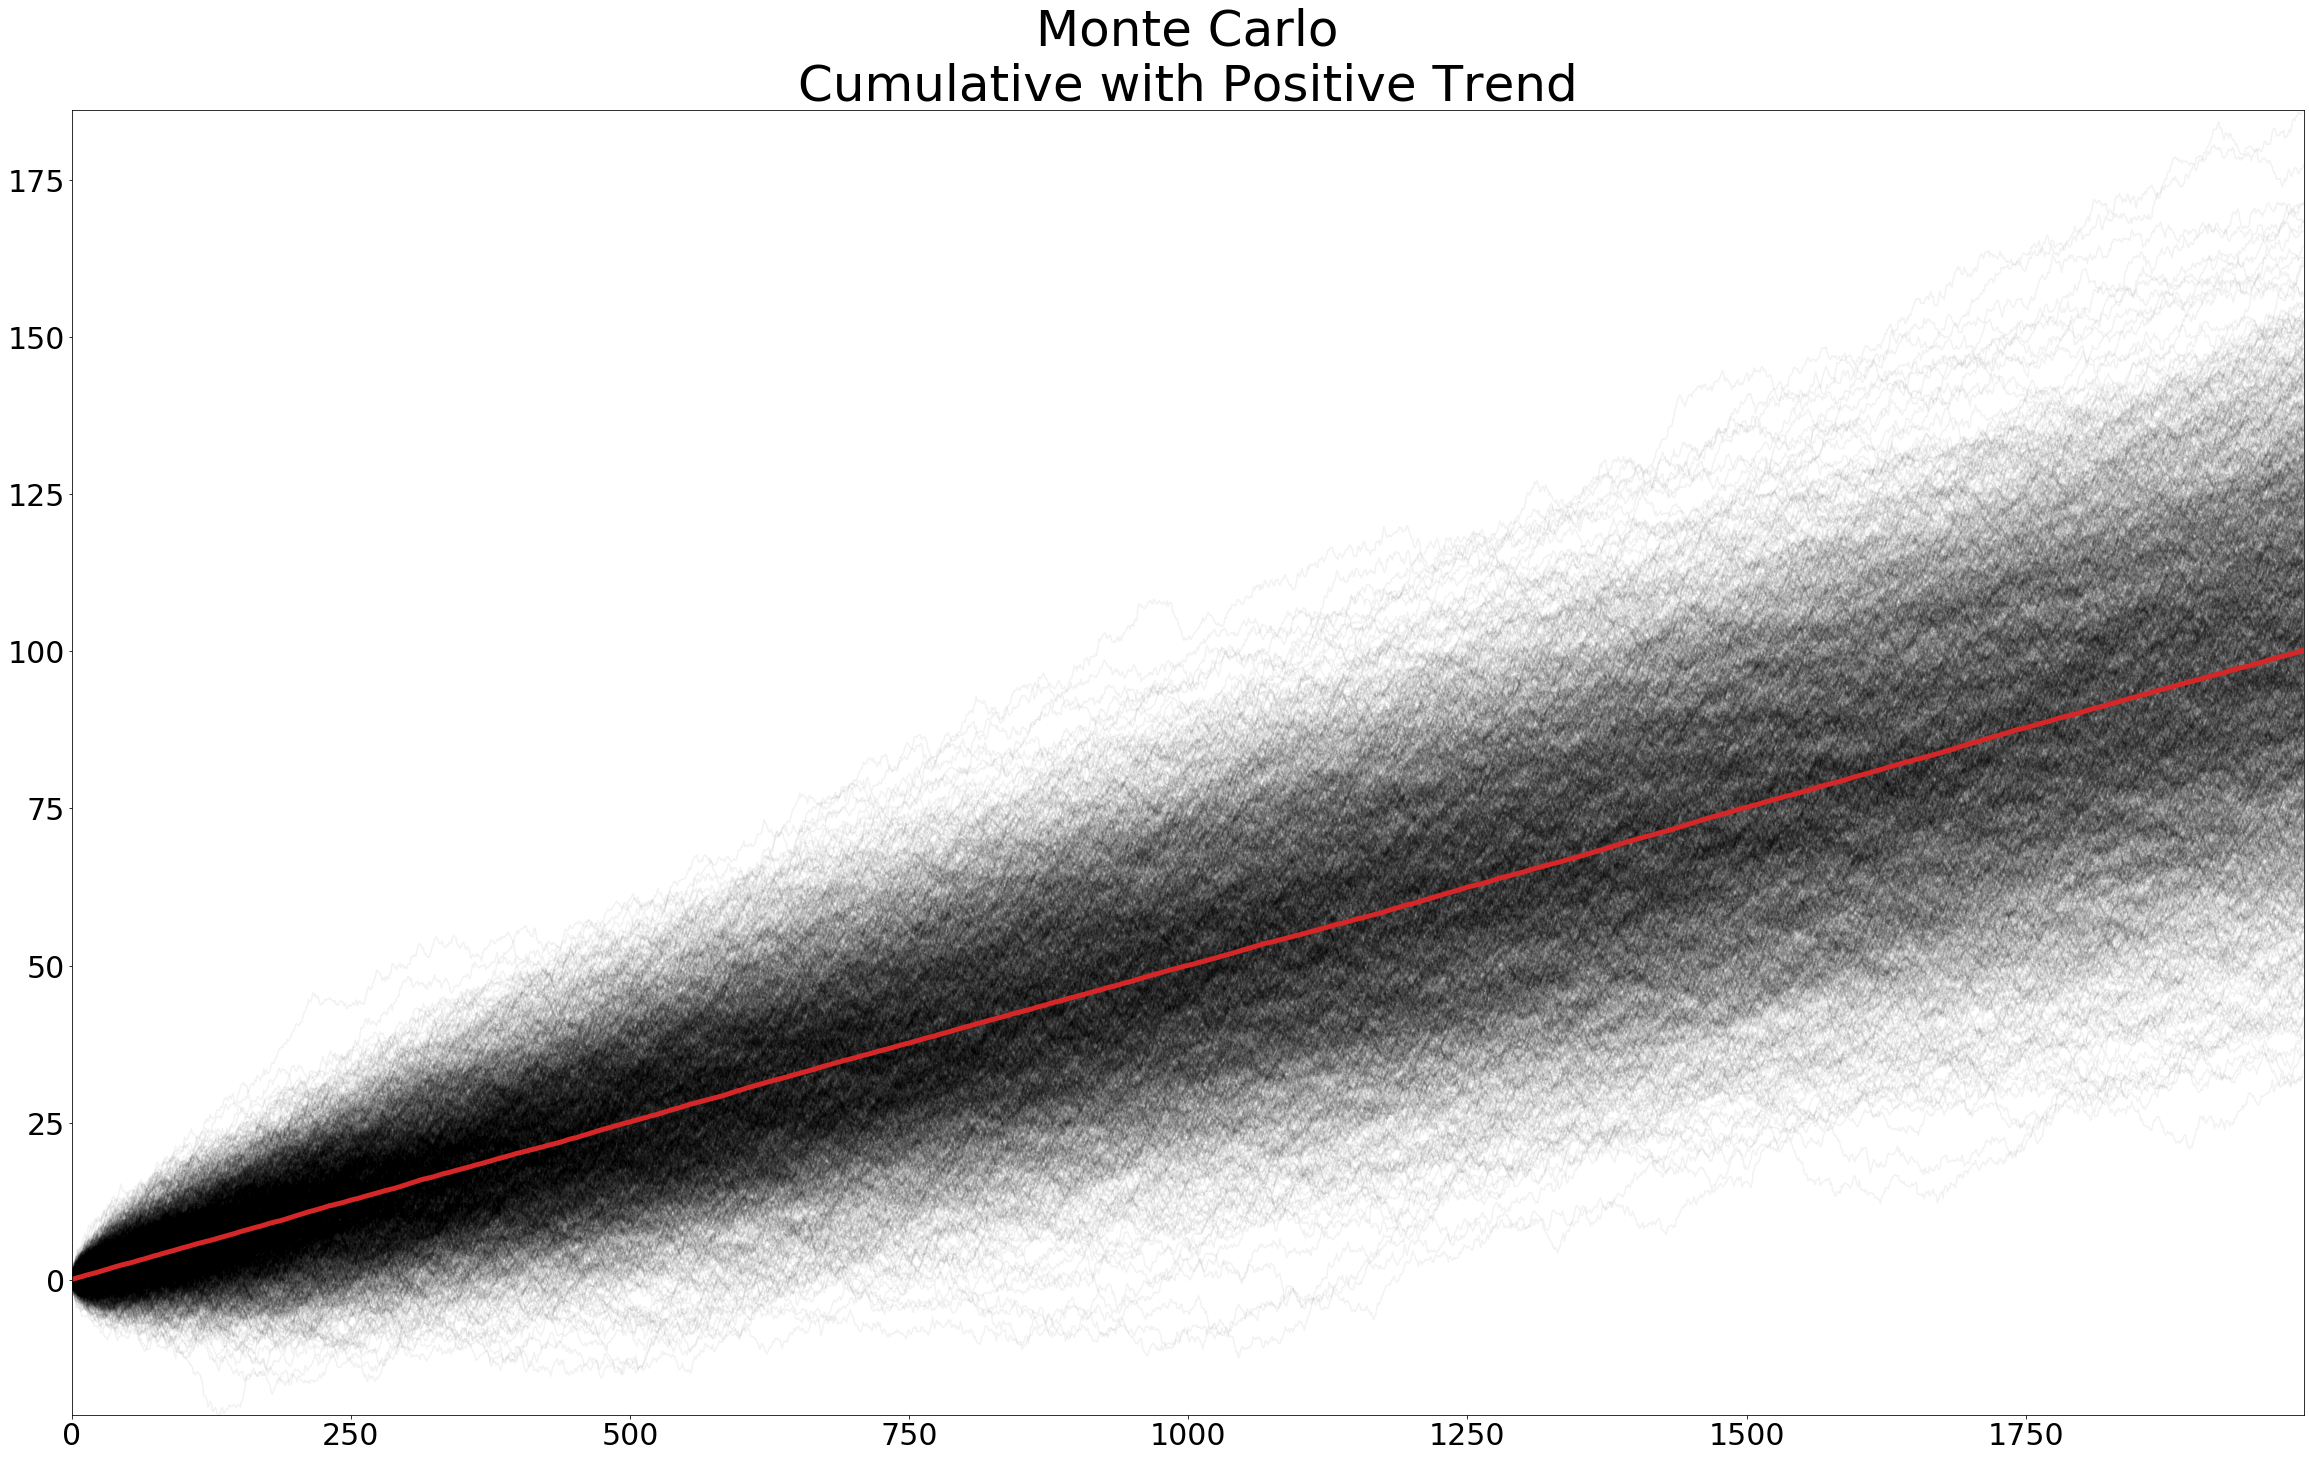

In [11]:
plot_monte_carlo_sim(monte_carlo_sim_df,  
    title = "Monte Carlo\nCumulative with Positive Trend", logy = False)


### Calculating Expected Value

In [12]:
monte_carlo_sim_df["mean"] = monte_carlo_sim_df.mean(axis = 1)
monte_carlo_sim_df["mean"]

0         0.051208
1         0.104989
2         0.170160
3         0.214239
4         0.266427
5         0.317979
6         0.366521
7         0.418957
8         0.469171
9         0.505207
10        0.564947
11        0.620639
12        0.677654
13        0.734649
14        0.779667
15        0.806638
16        0.865810
17        0.912509
18        0.963139
19        1.021424
20        1.052185
21        1.104752
22        1.151130
23        1.206573
24        1.262445
25        1.321465
26        1.361904
27        1.420720
28        1.473067
29        1.534606
           ...    
1970     98.725606
1971     98.779554
1972     98.833739
1973     98.877240
1974     98.909688
1975     98.948868
1976     99.008011
1977     99.054461
1978     99.098806
1979     99.151380
1980     99.195354
1981     99.236226
1982     99.281879
1983     99.325842
1984     99.354234
1985     99.404616
1986     99.453624
1987     99.509182
1988     99.550937
1989     99.602870
1990     99.663697
1991     99.

### Simulating Changes in Portfolio Values

In [13]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2005, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = "MSFT", "AAPL", "IBM", "GOOG"
for name in stocks:
    data_dict[name] = web.DataReader(name, "yahoo", start, end)

# make a list of the close data for each stock
close_data_dict = {key:val["Close"] for key, val in data_dict.items()}
close_data_df = pd.DataFrame(close_data_dict)

In [14]:
close_data_pct_change = close_data_df.pct_change()
close_data_pct_change

MSFT      AAPL       IBM      GOOG
Date                                              
2005-01-03       NaN       NaN       NaN       NaN
2005-01-04  0.003740  0.010270 -0.010742 -0.040501
2005-01-05 -0.002235  0.008758 -0.002068 -0.005090
2005-01-06 -0.001120  0.000775 -0.003109 -0.025632
2005-01-07 -0.002991  0.072812 -0.004366  0.028109
2005-01-10  0.004874 -0.004188 -0.001044  0.006242
2005-01-11 -0.002612 -0.063805 -0.007107 -0.007792
2005-01-12  0.001871  0.013941  0.002211  0.009507
2005-01-13 -0.019044  0.066300 -0.007982 -0.000256
2005-01-14 -0.005710  0.005731 -0.003706  0.023755
2005-01-18  0.007657  0.006410  0.008502  0.019653
2005-01-19 -0.012918 -0.010899 -0.018967 -0.032369
2005-01-20 -0.004619  0.008300 -0.001074 -0.017131
2005-01-21 -0.008121  0.000426 -0.006667 -0.029084
2005-01-24  0.000780  0.003830 -0.006387 -0.040153
2005-01-25  0.013635  0.018231  0.004358 -0.019920
2005-01-26 -0.000384  0.002776 -0.002603  0.068428
2005-01-27  0.003845  0.005398  0.000326 -0.006130
2005-01-28  0.002681  0.018447  0.009893  0.012016
2005-01-31  0.003820  0.039470  0.005706  0.027740
2005-02-01  0.004186  0.008192  0.004710 -0.019016
2005-02-02  0.002653  0.027086  0.004688  0.073267
2005-02-03 -0.010582 -0.022856 -0.008059  0.023791
2005-02-04  0.005348  0.013237  0.010370 -0.030826
2005-02-07 -0.006079  0.001268  0.000212 -0.040761
2005-02-08  0.003058  0.024829 -0.004231  0.013314
2005-02-09 -0.006479 -0.026700 -0.015192 -0.035542
2005-02-10 -0.000384 -0.004826  0.000647 -0.018791
2005-02-11 -0.003454  0.036371  0.005821 -0.003085
2005-02-14  0.001540  0.042113  0.002894  0.029829
...              ...       ...       ...       ...
2020-10-30 -0.010991 -0.056018  0.025250  0.034309
2020-11-02 -0.000691 -0.000827  0.011195  0.003097
2020-11-03  0.020264  0.015354  0.011071  0.014871
2020-11-04  0.048249  0.040837 -0.019797  0.059944
2020-11-05  0.031887  0.035494  0.025648  0.008141
2020-11-06  0.001926 -0.002856 -0.006361 -0.000919
2020-11-09 -0.023824 -0.019968  0.013066  0.000710
2020-11-10 -0.033793 -0.003009  0.020601 -0.012825
2020-11-11  0.026255  0.030353 -0.006022  0.007079
2020-11-12 -0.005126 -0.002343 -0.023038 -0.001637
2020-11-13  0.004967  0.000419  0.020524  0.015533
2020-11-16  0.003325  0.008720  0.012923  0.002454
2020-11-17 -0.012751 -0.007564 -0.005576 -0.006304
2020-11-18 -0.015761 -0.011391 -0.007901 -0.013202
2020-11-19  0.006348  0.005168  0.003511  0.009812
2020-11-20 -0.009557 -0.010958 -0.002048 -0.012319
2020-11-23 -0.001331 -0.029743  0.026937 -0.004207
2020-11-24  0.017848  0.011594  0.036056  0.019610
2020-11-25  0.000047  0.007467 -0.001768  0.001442
2020-11-27  0.006359  0.004826  0.001208  0.012284
2020-11-30 -0.005390  0.021100 -0.006675 -0.018096
2020-12-01  0.009997  0.030827 -0.002914  0.021218
2020-12-02 -0.003885  0.002934  0.011854  0.016601
2020-12-03 -0.005247 -0.001137 -0.008105 -0.000645
2020-12-04  0.000560 -0.005613  0.029043  0.000668
2020-12-07 -0.000327  0.012270 -0.019654 -0.004655
2020-12-08  0.008027  0.005091  0.008099 -0.000511
2020-12-09 -0.019490 -0.020904  0.008591 -0.018927
2020-12-10 -0.006043  0.011989 -0.014433 -0.004932
2020-12-11  0.013015 -0.006735 -0.005522  0.003628

[4015 rows x 4 columns]

In [15]:
close_data_normalized = close_data_pct_change.add(1).cumprod()
close_data_normalized.fillna(1, inplace =True)
close_data_normalized

MSFT        AAPL       IBM       GOOG
Date                                                 
2005-01-03  1.000000    1.000000  1.000000   1.000000
2005-01-04  1.003740    1.010270  0.989258   0.959499
2005-01-05  1.001496    1.019118  0.987212   0.954615
2005-01-06  1.000374    1.019908  0.984143   0.930146
2005-01-07  0.997382    1.094170  0.979847   0.956292
2005-01-10  1.002244    1.089588  0.978824   0.962261
2005-01-11  0.999626    1.020066  0.971867   0.954763
2005-01-12  1.001496    1.034287  0.974015   0.963840
2005-01-13  0.982423    1.102860  0.966240   0.963593
2005-01-14  0.976814    1.109180  0.962660   0.986483
2005-01-18  0.984293    1.116290  0.970844   1.005870
2005-01-19  0.971578    1.104124  0.952430   0.973312
2005-01-20  0.967091    1.113288  0.951407   0.956638
2005-01-21  0.959237    1.113762  0.945064   0.928815
2005-01-24  0.959985    1.118028  0.939028   0.891520
2005-01-25  0.973074    1.138410  0.943120   0.873761
2005-01-26  0.972700    1.141571  0.940665   0.933550
2005-01-27  0.976440    1.147733  0.940972   0.927828
2005-01-28  0.979058    1.168905  0.950281   0.938977
2005-01-31  0.982797    1.215042  0.955703   0.965024
2005-02-01  0.986911    1.224996  0.960205   0.946673
2005-02-02  0.989529    1.258177  0.964706   1.016033
2005-02-03  0.979058    1.229420  0.956931   1.040205
2005-02-04  0.984293    1.245694  0.966854   1.008140
2005-02-07  0.978310    1.247274  0.967059   0.967046
2005-02-08  0.981301    1.278243  0.962967   0.979922
2005-02-09  0.974944    1.244114  0.948338   0.945094
2005-02-10  0.974570    1.238110  0.948951   0.927335
2005-02-11  0.971204    1.283141  0.954476   0.924473
2005-02-14  0.972700    1.337178  0.957238   0.952050
...              ...         ...       ...        ...
2020-10-30  7.571803   96.321062  1.142302  16.053337
2020-11-02  7.566567   96.241425  1.155090  16.103051
2020-11-03  7.719895   97.719073  1.167877  16.342512
2020-11-04  8.092371  101.709588  1.144757  17.322146
2020-11-05  8.350411  105.319639  1.174118  17.463169
2020-11-06  8.366492  105.018805  1.166650  17.447126
2020-11-09  8.167165  102.921788  1.181893  17.459505
2020-11-10  7.891174  102.612104  1.206240  17.235592
2020-11-11  8.098355  105.726653  1.198977  17.357600
2020-11-12  8.056844  105.478906  1.171355  17.329177
2020-11-13  8.096859  105.523149  1.195396  17.598349
2020-11-16  8.123785  106.443359  1.210844  17.641528
2020-11-17  8.020195  105.638173  1.204092  17.530314
2020-11-18  7.893792  104.434823  1.194578  17.298874
2020-11-19  7.943904  104.974561  1.198772  17.468616
2020-11-20  7.867988  103.824298  1.196317  17.253417
2020-11-23  7.857517  100.736292  1.228542  17.180826
2020-11-24  7.997756  101.904249  1.272839  17.517736
2020-11-25  7.998130  102.665191  1.270588  17.542990
2020-11-27  8.048990  103.160686  1.272123  17.758485
2020-11-30  8.005610  105.337339  1.263632  17.437123
2020-12-01  8.085640  108.584612  1.259949  17.807110
2020-12-02  8.054226  108.903146  1.274885  18.102723
2020-12-03  8.011967  108.779272  1.264552  18.091038
2020-12-04  8.016455  108.168747  1.301279  18.103120
2020-12-07  8.013837  109.495971  1.275703  18.018843
2020-12-08  8.078160  110.053403  1.286036  18.009633
2020-12-09  7.920718  107.752883  1.297084  17.668762
2020-12-10  7.872850  109.044713  1.278363  17.581612
2020-12-11  7.975318  108.310321  1.271304  17.645390

[4015 rows x 4 columns]

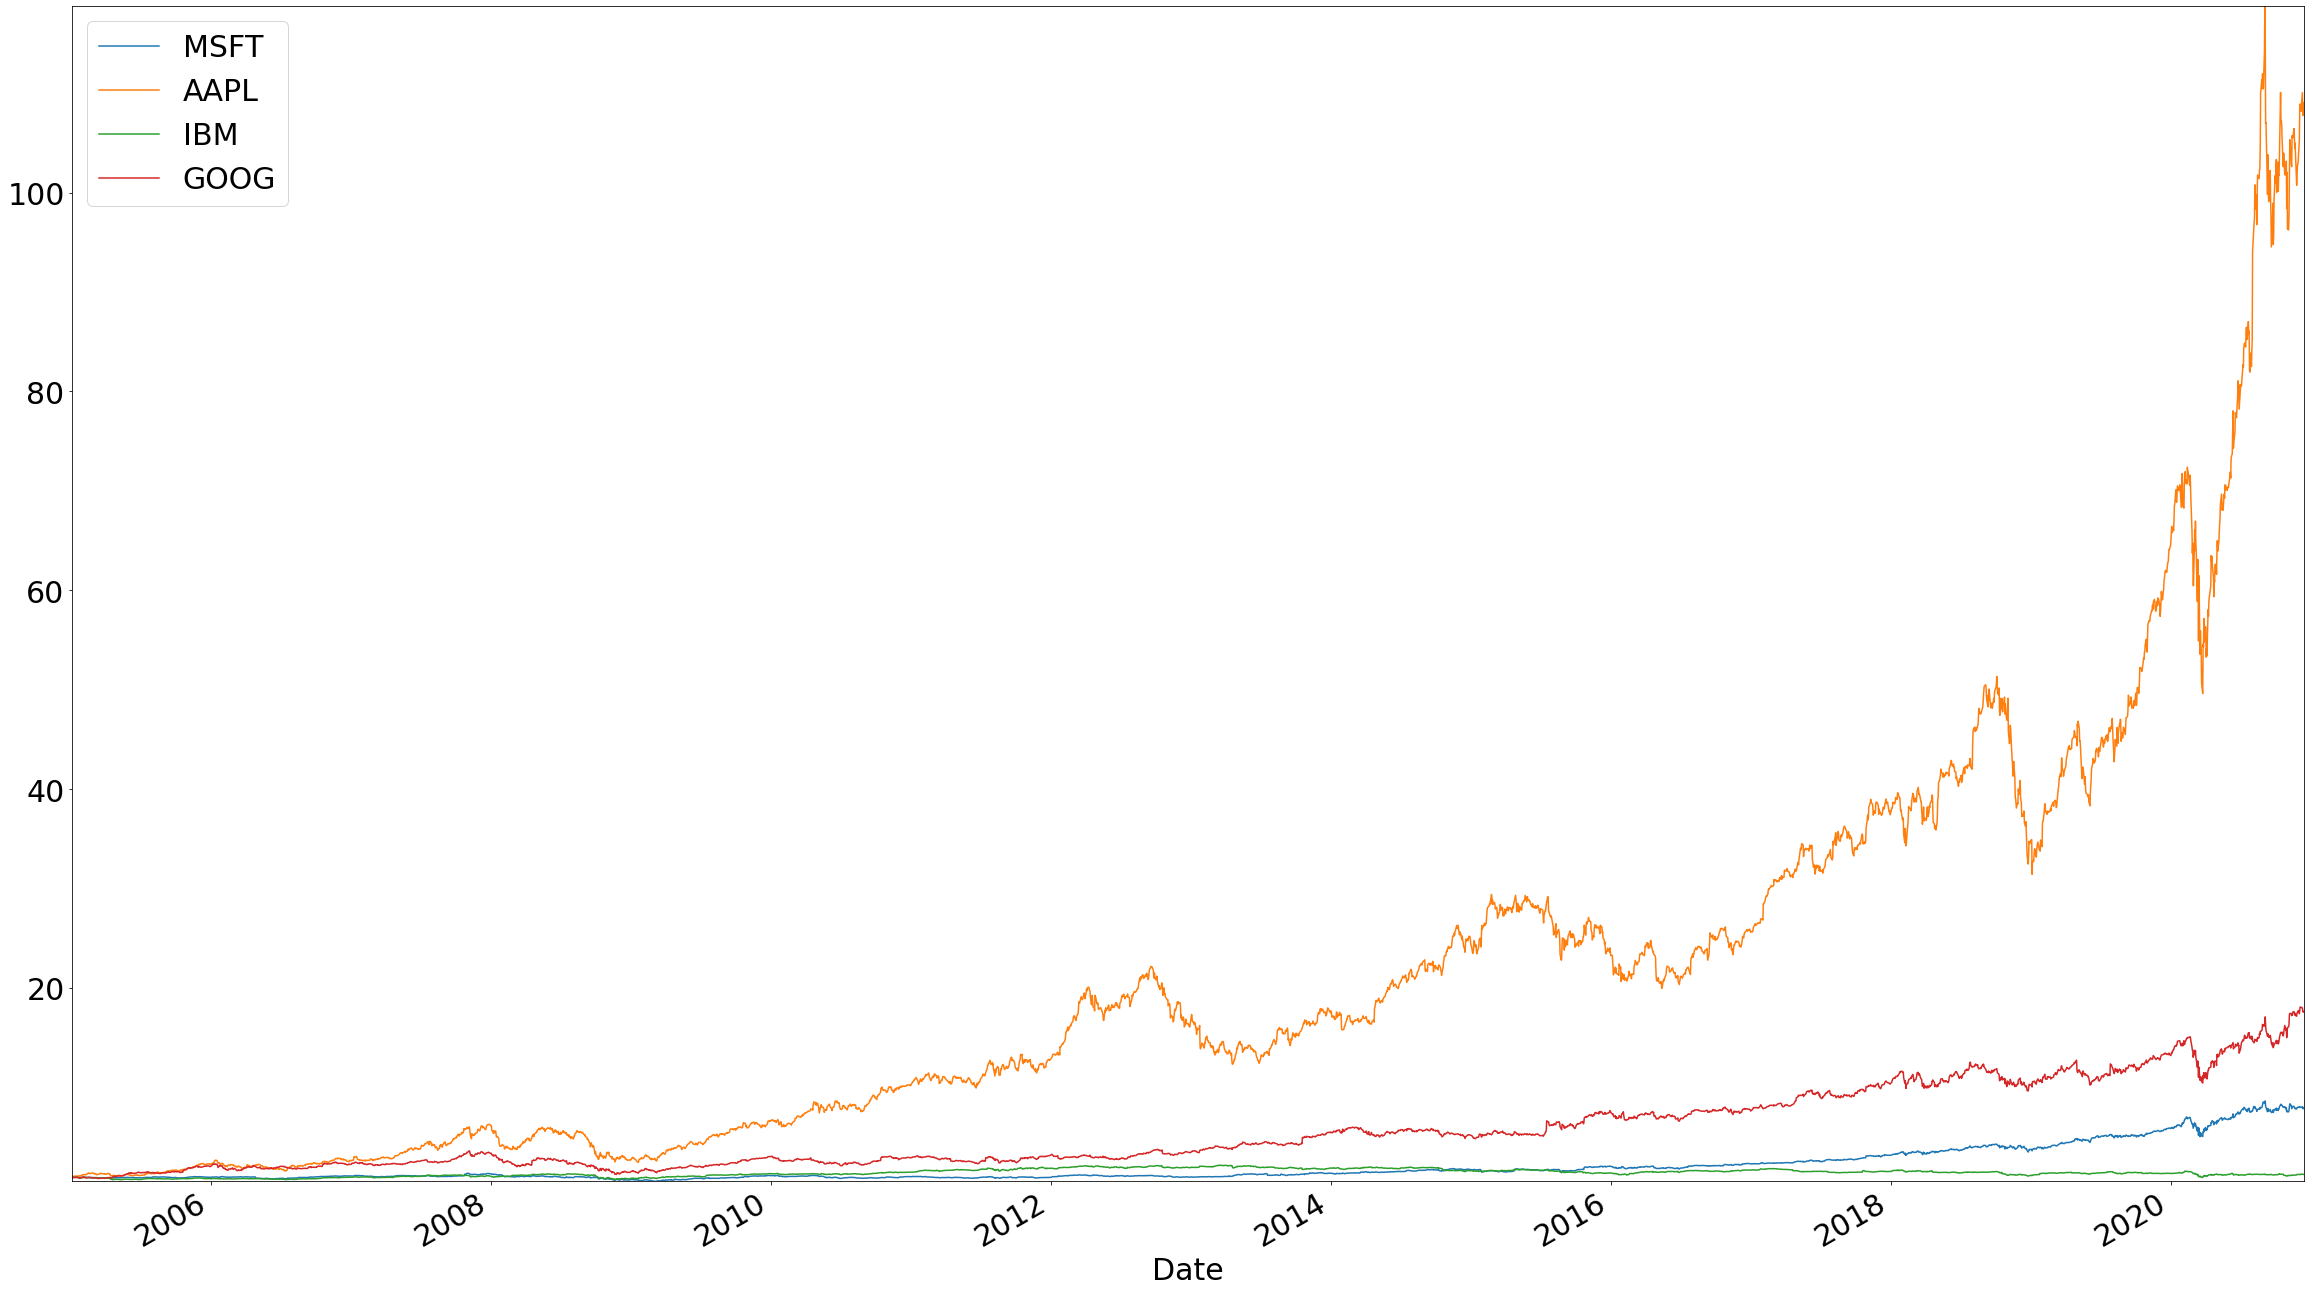

In [16]:
fig, ax = plt.subplots(figsize=(40,24))
close_data_normalized.plot.line(ax = ax)
plt.show()
plt.close()

### Daily Rate of Return

Derive the daily rate of return from the present value equation.

>$PV = \frac{FV}{(1 + r)^t}$
>
>Overall rate of return: $R=\frac{FV}{PV}$

Discount the overall rate of return to find the average rate of return. We will use this to define the mean of the standard normal distribution:

>$ r = (R)^{\frac{1}{t}} - 1$
>
>$t$ is measured in days

In [17]:
mean_var_df = pd.DataFrame({"mean": close_data_normalized.iloc[-1].div(close_data_normalized.iloc[0]) ** (
                                1 / close_data_normalized["MSFT"].count()) - 1, 
                            "sigma" : close_data_pct_change.std()})
mean_var_df

mean     sigma
MSFT  0.000517  0.017284
AAPL  0.001168  0.021036
IBM   0.000060  0.014579
GOOG  0.000715  0.018819

In [18]:
num_sims = 500
dates = list(close_data_df.index)
monte_carlo_sim_dict = {}
for stock in stocks:
    monte_carlo_sim_dict[stock] = {}
    mean = mean_var_df["mean"][stock]
    sigma = mean_var_df["sigma"][stock]   
    run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict[stock], dates)
#    monte_carlo_sim_dict[stock] = pd.DataFrame(monte_carlo_sim_dict[stock]).add(1).cumprod()
monte_carlo_sim_dfs = {stock: pd.DataFrame(monte_carlo_sim_dict[stock]).add(1).cumprod() for stock in stocks}

In [19]:
monte_carlo_sim_dfs

{'MSFT':                   0         1         2         3          4         5    \
 2005-01-03   1.019088  1.007217  0.961704  0.992624   0.985992  0.975304   
 2005-01-04   1.036268  1.017997  0.981466  1.025783   1.011493  0.957954   
 2005-01-05   1.037270  1.042059  1.017133  1.029121   1.002953  0.972943   
 2005-01-06   1.044020  1.058973  1.039800  1.002441   0.974183  0.936019   
 2005-01-07   1.033843  1.092579  1.032191  1.014943   0.974161  0.943854   
 2005-01-10   1.009369  1.089096  1.067778  0.988224   1.008370  0.945720   
 2005-01-11   1.010199  1.063422  1.124400  1.006284   1.010676  0.957232   
 2005-01-12   1.038865  1.042253  1.102033  0.997160   0.982272  0.950664   
 2005-01-13   1.033648  1.077581  1.102754  1.000496   0.977442  0.969846   
 2005-01-14   1.034138  1.111592  1.108518  1.033141   0.970210  1.007998   
 2005-01-18   1.034130  1.123188  1.089677  1.037271   0.965734  0.995452   
 2005-01-19   1.006370  1.117131  1.075079  1.048214   0.956359  1.0

In [20]:
def plot_monte_carlo_sim(sim_data, observed_data = None, title = None, logy = True):
    sim_data["mean"] = sim_data.mean(axis=1)    
    #sim_data["median"] = sim_data.median(axis=1)    
    index = sim_data.index
    fig, ax = plt.subplots(figsize = (40, 24))
    sim_data.drop(["mean"], inplace = False, axis = 1).plot.line(
            legend=False, marker =".", markersize = .1, color = "k", alpha = .05, logy = logy, ax = ax)
    if observed_data is not None:
        observed_data.plot.line(legend = False, color = "C2", linewidth = 5, logy = logy, ax = ax)
    
        # find x coordinate of lowest value observed
        obs_text_x = observed_data[observed_data == observed_data.min()].index
        plt.text(obs_text_x, observed_data.loc[obs_text_x] * .7,
                 "Observed", fontsize = 70, color = "C2")
    sim_data["mean"].plot.line(legend = False, color = "C3", 
                               linewidth = 5, logy = logy, ax = ax)
    plt.text(index[-400], sim_data["mean"].iloc[-400] * 1.5, "Exp\nVal",
            fontsize = 70, color = "C3")
    sim_data["median"].plot.line(legend = False, color = "C3", ls = "--", 
                               linewidth = 5, logy = logy, ax = ax)
#    plt.text(index[-400], sim_data["median"].iloc[-400], "Median",
#            fontsize = 70, color = "C3")
    
    
    
    plt.title(title, fontsize = 50)
    plt.show()
    plt.close()

In [21]:
monte_carlo_sim_dfs[stock].median(axis = 1)

2005-01-03    1.000130
2005-01-04    1.001010
2005-01-05    0.999259
2005-01-06    1.001949
2005-01-07    0.999963
2005-01-10    1.001970
2005-01-11    1.003003
2005-01-12    1.002654
2005-01-13    1.006657
2005-01-14    1.005950
2005-01-18    1.004175
2005-01-19    1.005552
2005-01-20    1.006445
2005-01-21    1.007909
2005-01-24    1.009929
2005-01-25    1.008065
2005-01-26    1.008767
2005-01-27    1.008698
2005-01-28    1.005912
2005-01-31    1.009079
2005-02-01    1.005708
2005-02-02    1.007415
2005-02-03    1.005151
2005-02-04    1.011443
2005-02-07    1.007412
2005-02-08    1.008853
2005-02-09    1.010746
2005-02-10    1.013060
2005-02-11    1.013646
2005-02-14    1.013359
                ...   
2020-10-30    8.320209
2020-11-02    8.364205
2020-11-03    8.420454
2020-11-04    8.382810
2020-11-05    8.331329
2020-11-06    8.391339
2020-11-09    8.463453
2020-11-10    8.494072
2020-11-11    8.584359
2020-11-12    8.549310
2020-11-13    8.579849
2020-11-16    8.718705
2020-11-17 

KeyError: 'median'

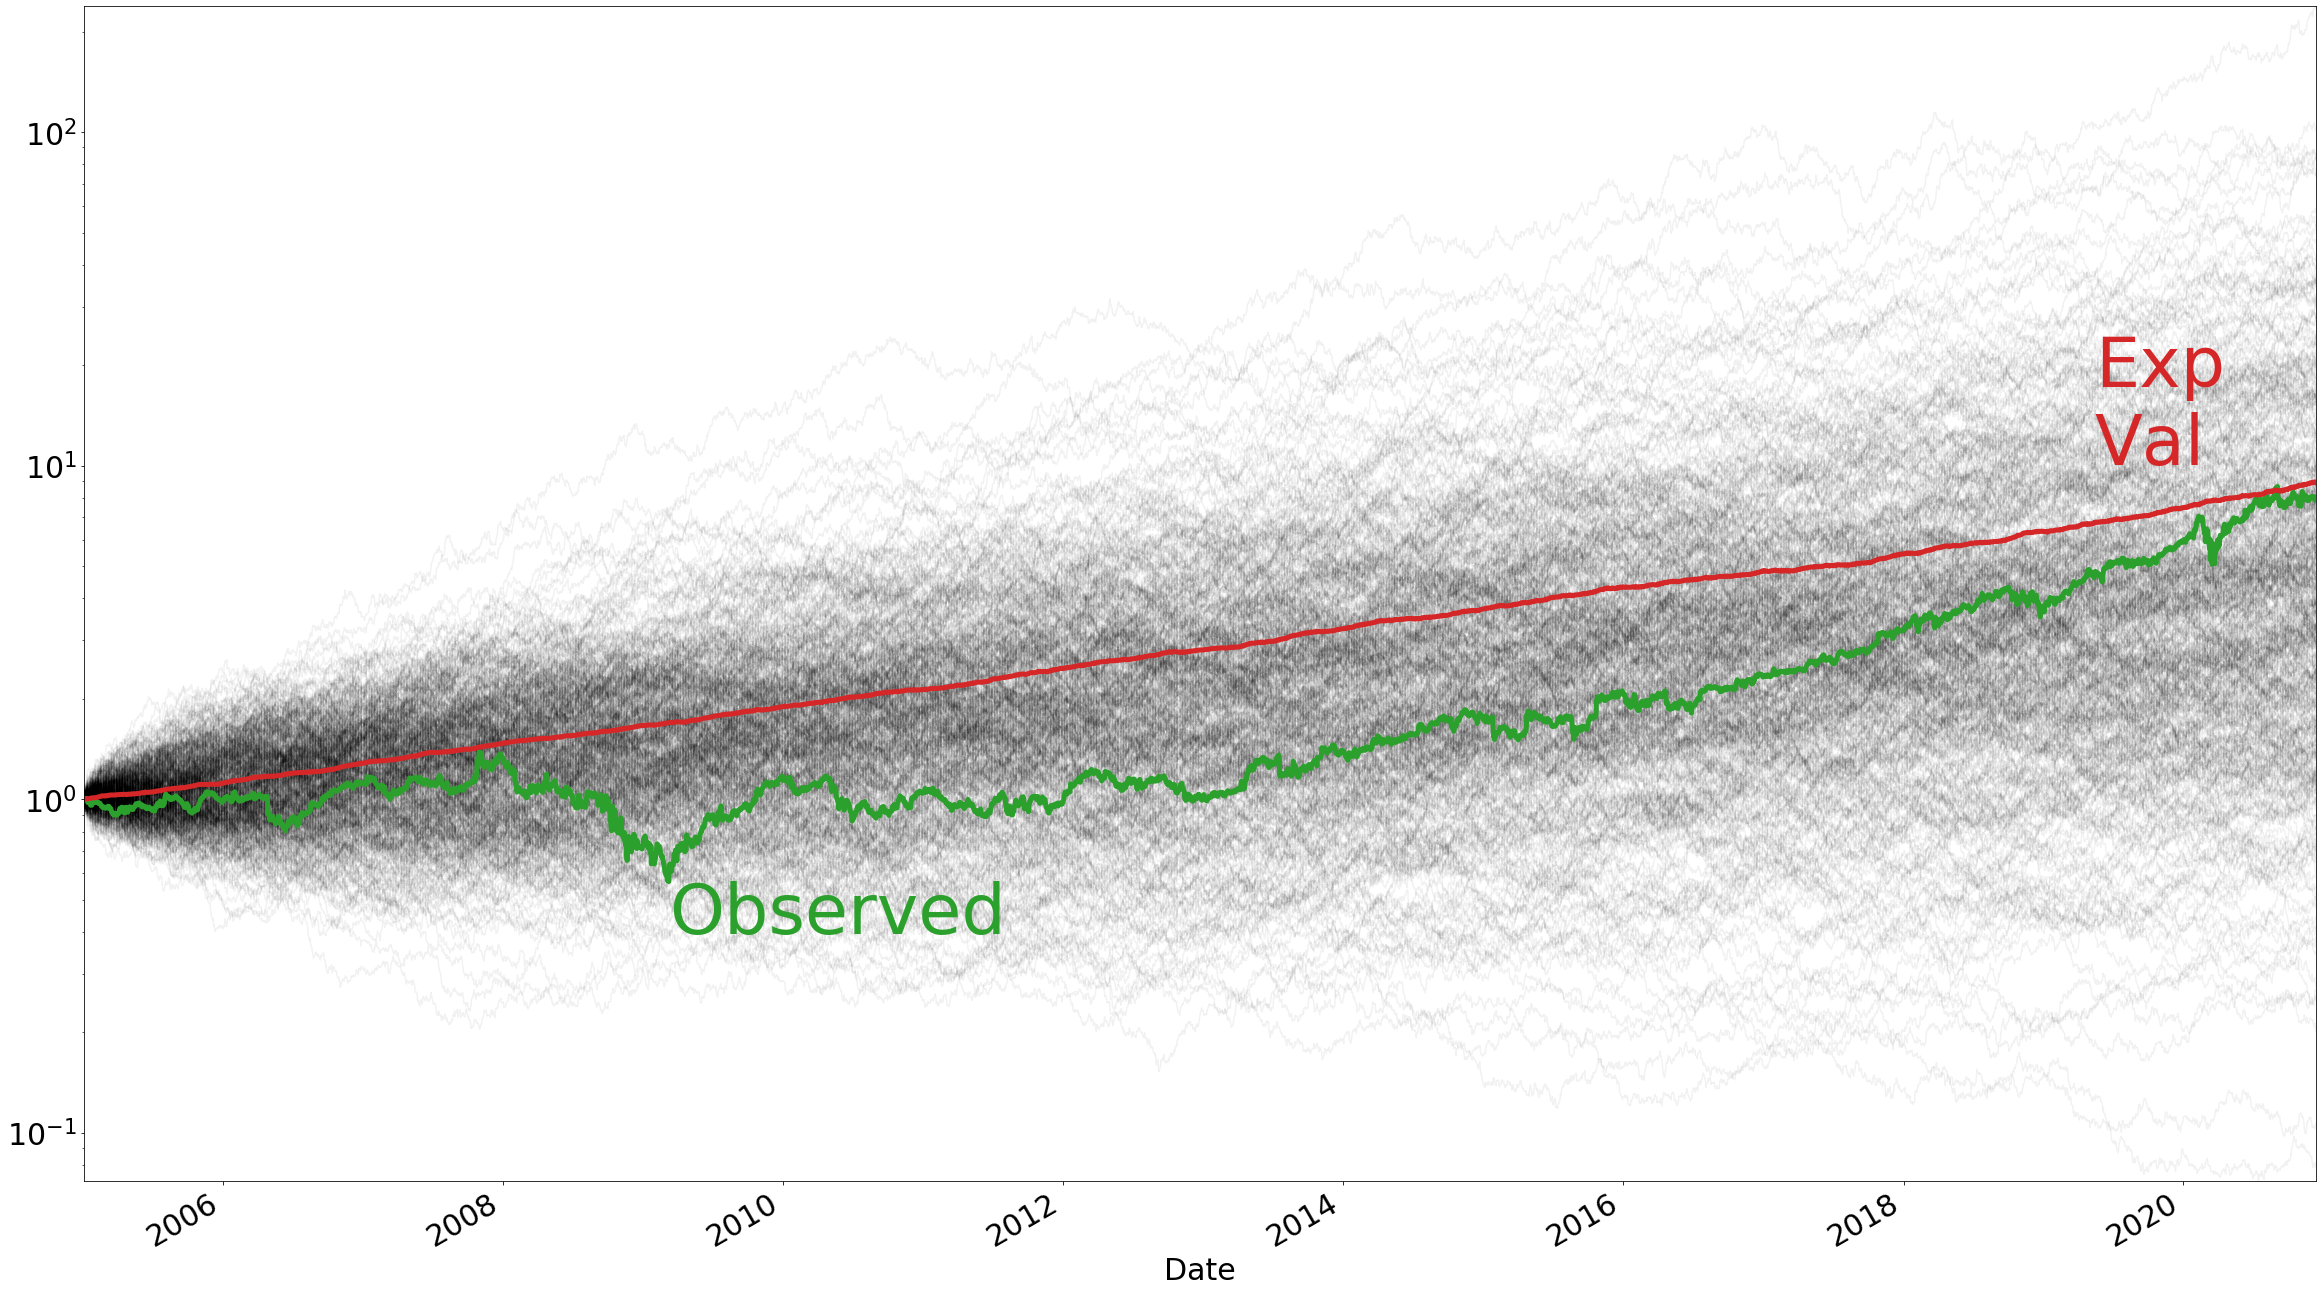

In [22]:
for stock in stocks:
    plot_monte_carlo_sim(monte_carlo_sim_dfs[stock], close_data_normalized[stock], stock, logy= True)


## Calculate Portfolio Return

In [ ]:
portfolio_weights = {stock: 1 / len(stocks) for stock in stocks}
portfolio_weights

In [ ]:
ex_return = pd.DataFrame(close_data_normalized.apply(lambda x :x.mul(portfolio_weights[x.name]), axis = 0).sum(axis=1),
                        columns = ["Portfolio Return"])
close_data_normalized["Portfolio Return"] = ex_return
close_data_normalized

In [ ]:
close_data_normalized.plot.line(legend=False, logy = True)

In [ ]:
ex_return_pct_change = ex_return.pct_change()
ex_return_pct_change.dropna(inplace = True)
ex_return_pct_change

In [ ]:
mean_var_df = pd.DataFrame({"mean": (ex_return.iloc[-1] / ex_return.iloc[0]) **(1 / ex_return["Portfolio Return"].count()) -1,
                           "sigma" : ex_return_pct_change.std()})
mean_var_df

In [ ]:
num_sims = 1000
dates = ex_return.index
monte_carlo_sim_dict = {}
mean = mean_var_df["mean"]["Portfolio Return"]
sigma = mean_var_df["sigma"]["Portfolio Return"]
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, dates)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).add(1).cumprod()
monte_carlo_sim_df

In [ ]:
plot_monte_carlo_sim(monte_carlo_sim_df, ex_return["Portfolio Return"], "Portfolio Return", logy= True)